In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import scipy.stats as st
from os import path
import os
import json

output_file = os.path.join("output_data", "country_player_count.csv")


In [26]:
file = os.path.join("resources", "countries.csv")
countries_df = pd.read_csv(file)
countries_df.head()

country_name =[]
country_codes = []
player_count = []

for index, row in countries_df.iterrows():
    country_code = row["Code"]
    country = row["Country"]
    
    
    filepath = f'output_data/players_{country_code}.csv'
    
    if (path.exists(filepath)):
        players_df =  pd.read_csv(filepath)
              

    country_name.append(row["Country"])
    country_codes.append(row["Code"])
    player_count.append(len(players_df))

    
country_player_count_df = pd.DataFrame({"Country": country_name,
                                       "Country Code": country_codes,
                                        "Player Count": player_count})

count_sorted = country_player_count_df.sort_values("Player Count", ascending=False)
count_sorted = count_sorted.reset_index()
count_sorted

,index,Country,Country Code,Player Count
0,105,British Indian Ocean Territory,IO,276922
1,104,India,IN,276922
2,76,United Kingdom of Great Britain and Northern I...,GB,192118
3,74,France,FR,176560
4,30,Brazil,BR,147040
...,...,...,...,...
244,118,Comoros,KM,35
245,92,Guinea-Bissau,GW,30
246,245,Mayotte,YT,25
247,210,Sint Maarten (Dutch part),SX,25


In [29]:
count_sorted.to_csv(output_file, index=True, header=True)

C:\Users\jenny\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jenny\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)


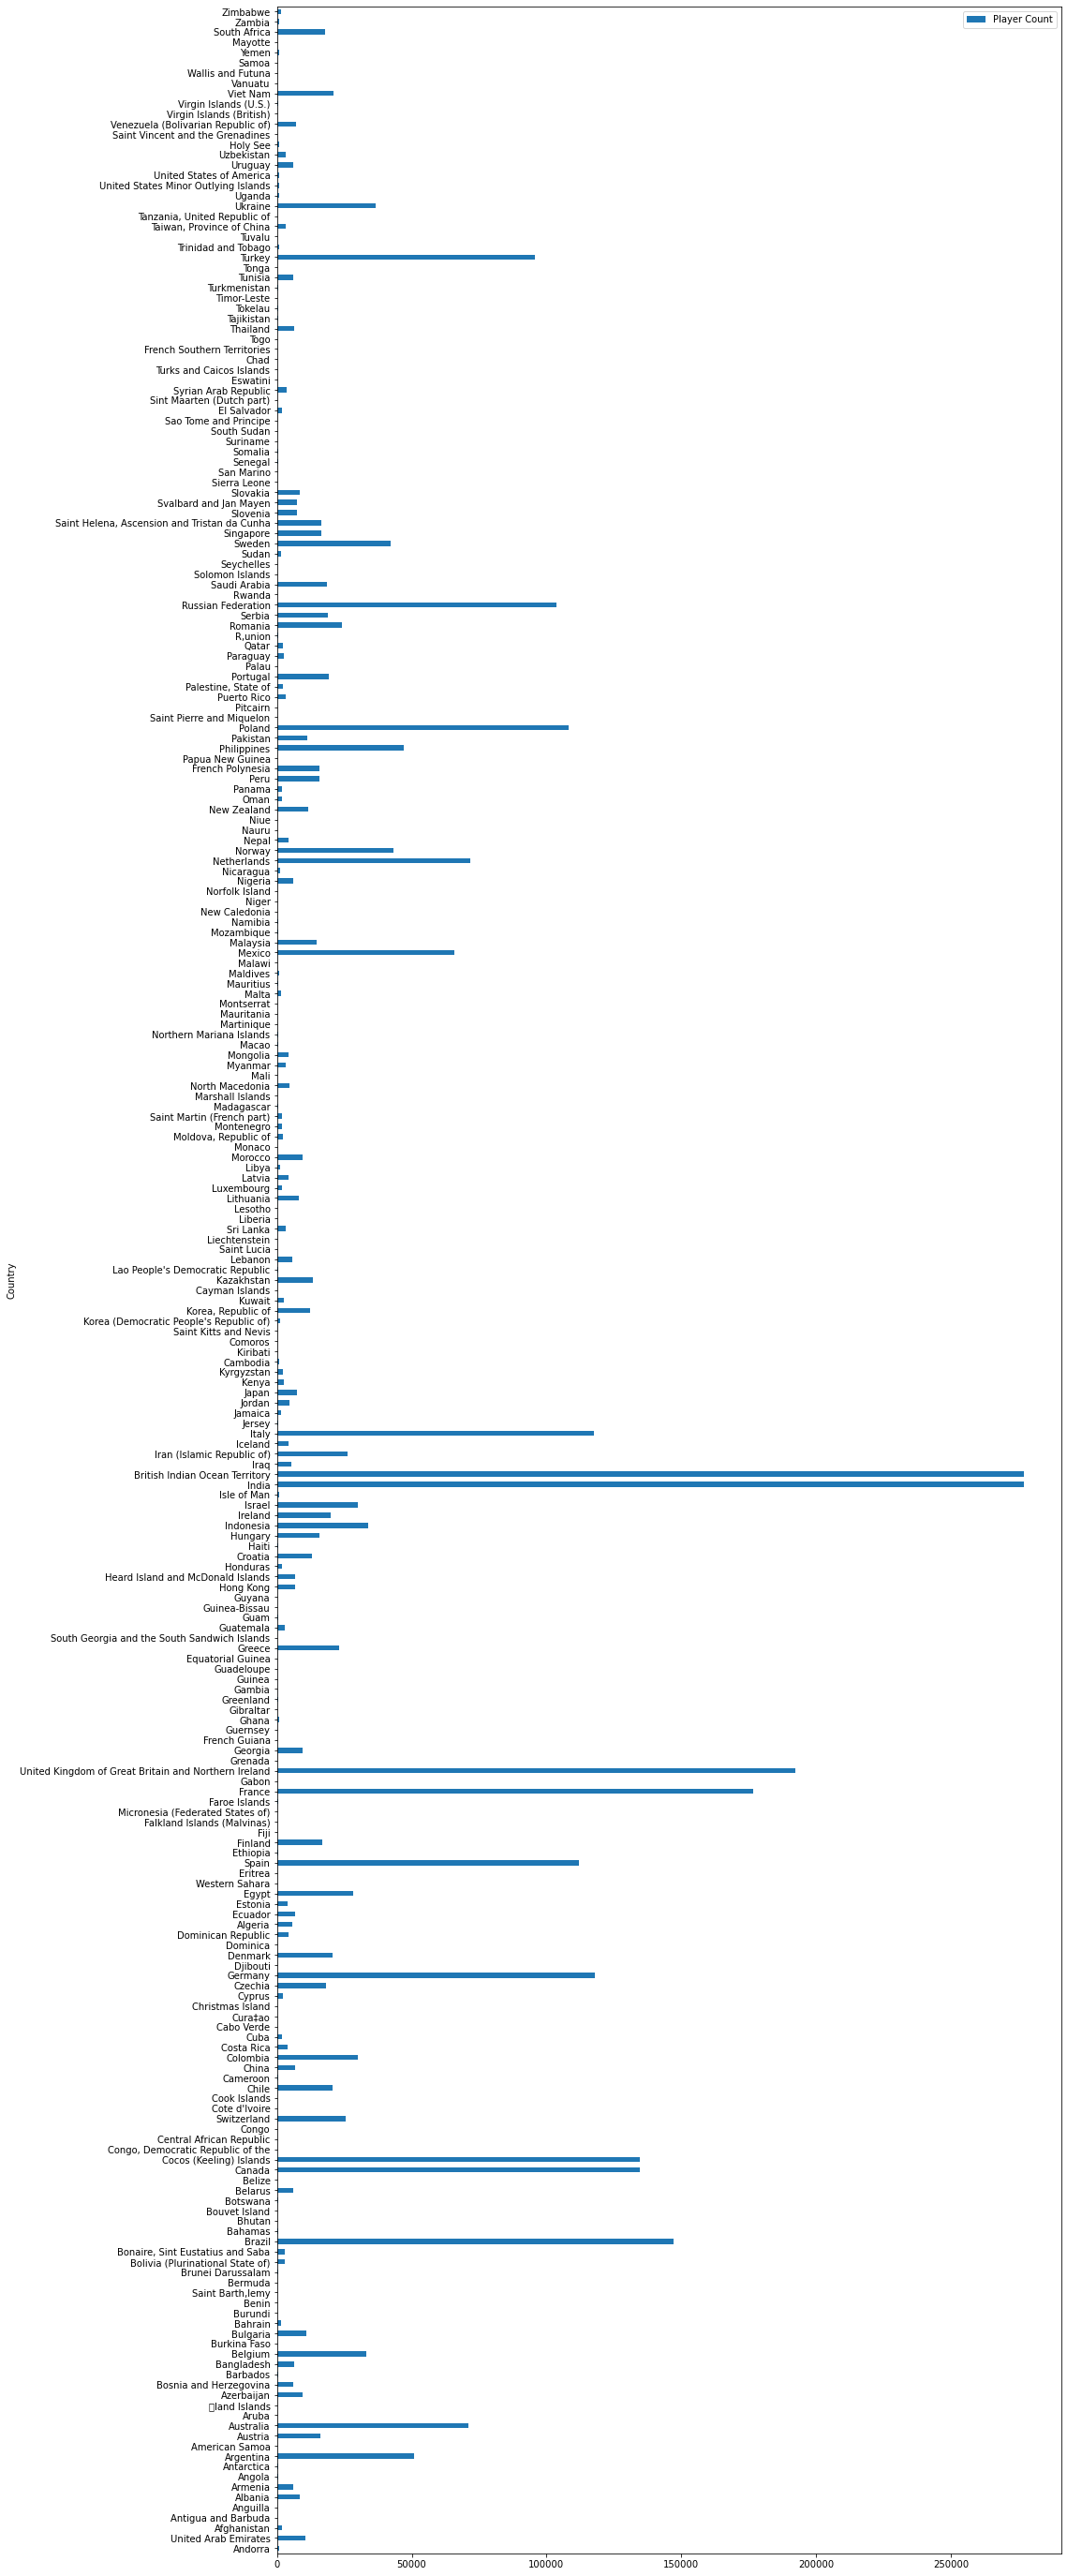

In [24]:
country_player_count_df.plot.barh(x="Country", y="Player Count", rot=0, align='center', figsize=(15, 50))
plt.show()